<a href="https://colab.research.google.com/github/Kunaldahiya2907/Marketing-Research-Methods---Kunal-Dahiya_JioInstitute/blob/main/Reddit_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw textblob  # Install necessary packages
import praw
from textblob import TextBlob

# Replace with your actual Reddit API credentials
reddit = praw.Reddit(
    client_id="KC_J0ZSU4XW4yga-T7z7nw",
    client_secret="Udq6MxFz3uUS5yyZBG6nJbx2MA09LQ",
    user_agent="Intrepid_Border_3664",
)

subreddit = reddit.subreddit("uberdrivers")

for submission in subreddit.hot(limit=10):
    print(submission.title)

    # Sentiment Analysis
    blob = TextBlob(submission.title)
    sentiment = blob.sentiment.polarity

    if sentiment > 0:
        print("Sentiment: Positive")
    elif sentiment < 0:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.1 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Welcome to r/uberdrivers - FAQ and Community Guide
Sentiment: Positive
They are lying! I will never do delivery again.
Sentiment: Neutral
Cleaning Fees
Sentiment: Neutral
4-5 inches of snow and still snowing. 
Sentiment: Neutral
Just a reminder -- its not worth it to drive on ice
Sentiment: Negative
Uber no longer accepts phone calls
Sentiment: Neutral
I'm convinced half of the low passenger ratings are pure racism...
Sentiment: Positive
Part 1 It’s only been 5 days into the year and I’ve already had a couple of incidents in my car.
Sentiment: Neutral
Regarding being an Uber driver
Sentiment: Neutral
Should I be concerned??
Sentiment: Neutral


In [ ]:
import pandas as pd
import statsmodels.formula.api as sm

# Load the dataset
df = pd.read_excel("bank marketing - logistic.xlsx")

# Assuming 'y' is your dependent variable and you want to include all other columns as predictors
formula = 'y ~ ' + ' + '.join(df.columns.difference(['y']))

# Fit the logistic regression model
model = sm.logit(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (4521, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
# Install necessary libraries
!pip install pandas openpyxl statsmodels

# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as sm

# Load the dataset
try:
    df = pd.read_excel("bank marketing - logistic.xlsx")
except FileNotFoundError:
    print("Error: 'bank marketing - logistic.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Inspect the 'y' column to see what values it contains
print("Original unique values in 'y' column:", df['y'].unique())

# Convert the 'y' column from strings to numbers
# Map "yes" to 1 and "no" to 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Re-inspect the 'y' column to confirm changes
print("Unique values in 'y' column after conversion:", df['y'].unique())

# Ensure 'y' is one dimensional
# Check the dimension of y
print(f"The number of dimensions of y is {df['y'].ndim}")

# Ensure that there are only 2 values in the column
# Check to see if the number of unique values are greater than 2
if len(df['y'].unique()) > 2:
    print(f"ERROR: There are more than 2 unique values: {df['y'].unique()}")
    exit()

# Assuming 'y' is your dependent variable and you want to include all other columns as predictors
formula = 'y ~ ' + ' + '.join(df.columns.difference(['y']))

# Fit the logistic regression model
model = sm.logit(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

Original unique values in 'y' column: ['no' 'yes']
Unique values in 'y' column after conversion: [0 1]
The number of dimensions of y is 1
Optimization terminated successfully.
         Current function value: 0.240395
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4478
Method:                           MLE   Df Model:                           42
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.3273
Time:                        14:12:38   Log-Likelihood:                -1086.8
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                3.119e-194
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [ ]:
# Install necessary libraries
!pip install pandas openpyxl statsmodels matplotlib seaborn

# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
try:
    df = pd.read_excel("bank marketing - logistic.xlsx")
except FileNotFoundError:
    print("Error: 'bank marketing - logistic.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Inspect the 'y' column
print("Original unique values in 'y' column:", df['y'].unique())

# Convert the 'y' column from strings to numbers
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Re-inspect the 'y' column
print("Unique values in 'y' column after conversion:", df['y'].unique())

# Ensure 'y' is one dimensional
print(f"The number of dimensions of y is {df['y'].ndim}")
if len(df['y'].unique()) > 2:
    print(f"ERROR: There are more than 2 unique values: {df['y'].unique()}")
    exit()

# Assuming 'y' is your dependent variable and you want to include all other columns as predictors
formula = 'y ~ ' + ' + '.join(df.columns.difference(['y']))

# Fit the logistic regression model
model = sm.logit(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

# --- Visualization ---

# 1. Predicted Probabilities vs. One Predictor (e.g., 'age')
def plot_predicted_probabilities(model, data, predictor_variable):
    """Plots predicted probabilities against a given predictor variable."""

    if predictor_variable not in data.columns:
        print(f"Error: Predictor variable '{predictor_variable}' not found in the dataset.")
        return

    data_sorted = data.sort_values(by=predictor_variable)
    # Generate a range of values for the predictor variable
    predictor_range = np.linspace(data_sorted[predictor_variable].min(), data_sorted[predictor_variable].max(), 100)

    # Create a new dataframe with these values
    new_data = pd.DataFrame({predictor_variable: predictor_range})

    # For other columns, set the mean value.
    for col in data.columns.difference([predictor_variable,'y']):
        new_data[col] = data[col].mean()

    # Get predicted probabilities
    predicted_probabilities = model.predict(new_data)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(predictor_range, predicted_probabilities, color='blue')
    plt.xlabel(predictor_variable)
    plt.ylabel('Predicted Probability of y=1')
    plt.title(f'Predicted Probability vs. {predictor_variable}')
    plt.grid(True)
    plt.show()

# Example usage for 'age':
plot_predicted_probabilities(model, df, 'age')

# 2. Coefficients Plot (Odds Ratios)
def plot_coefficients(model):
    """Plots the coefficients (odds ratios) from the logistic regression model."""
    coefficients = model.params
    conf_int = model.conf_int()
    odds_ratios = np.exp(coefficients)
    lower_ci = np.exp(conf_int[0])
    upper_ci = np.exp(conf_int[1])

    # Create a DataFrame for easier plotting
    coef_df = pd.DataFrame({'Odds Ratio': odds_ratios,
                            'Lower CI': lower_ci,
                            'Upper CI': upper_ci})
    coef_df = coef_df.drop(index=['Intercept'])  # Drop the intercept for this plot
    coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.errorbar(x=coef_df['Odds Ratio'], y=coef_df.index,
                 xerr=[coef_df['Odds Ratio'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Odds Ratio']],
                 fmt='o', capsize=5)
    plt.axvline(x=1, color='red', linestyle='--')  # Add a vertical line at 1 for reference
    plt.xlabel('Odds Ratio')
    plt.ylabel('Predictor Variables')
    plt.title('Odds Ratios and 95% Confidence Intervals')
    plt.grid(True)
    plt.show()

# Example usage
plot_coefficients(model)


# 3. Correlation Matrix
def plot_correlation_matrix(data):
    """Plots the correlation matrix of the dataset."""
    corr = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Example usage:
plot_correlation_matrix(df)

Original unique values in 'y' column: ['no' 'yes']
Unique values in 'y' column after conversion: [0 1]
The number of dimensions of y is 1
Optimization terminated successfully.
         Current function value: 0.240395
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4478
Method:                           MLE   Df Model:                           42
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.3273
Time:                        14:13:28   Log-Likelihood:                -1086.8
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                3.119e-194
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

TypeError: Could not convert string 'cellularcellularcellularunknownunknowncellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularunknowntelephonecellularcellulartelephonecellularcellularcellularcellularunknowntelephonecellularcellularunknownunknowncellularcellularcellularcellularunknowntelephoneunknowncellularcellularunknowncellularcellularcellularcellulartelephonetelephonecellularunknownunknowntelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknownunknownunknowncellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularunknowncellularunknowncellularunknowncellularunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellulartelephonetelephoneunknowncellularunknowncellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularunknowncellulartelephonecellularcellularunknownunknowncellularunknowncellularcellularcellularcellularunknowncellularcellularunknowncellularunknowncellularunknowncellularcellularunknownunknowncellularunknowncellularunknowncellularcellularcellularcellularcellularunknownunknownunknownunknowncellularunknowntelephonecellularunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknownunknowncellulartelephonecellularcellularcellulartelephonecellularcellularunknowncellularcellularunknowncellularcellulartelephonecellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellulartelephonecellularcellularunknownunknowncellularcellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellulartelephonecellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularunknowncellularunknownunknownunknownunknownunknownunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellulartelephonecellularcellularcellularcellularunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularunknowncellularunknownunknowncellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularunknowncellularunknowncellularcellularunknowntelephonetelephonecellularcellularunknownunknowncellularunknowncellularunknowncellularcellularcellularunknowncellularcellulartelephonecellularcellularcellularcellularcellularunknowncellularunknowncellulartelephonecellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularunknowncellularcellularcellularunknownunknownunknownunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellulartelephonecellularcellularunknowncellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellularcellulartelephoneunknownunknowncellularunknowncellularunknowncellularcellularunknownunknownunknowntelephoneunknownunknownunknowntelephonecellularcellularcellularunknowncellularunknownunknowncellularunknownunknowntelephonecellularcellularunknowncellularcellularunknowncellularcellulartelephonecellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularunknowntelephonecellularcellularunknownunknownunknowncellularcellulartelephonecellulartelephonecellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellulartelephonecellularunknowncellularcellularunknownunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularunknowncellularunknowncellularunknowncellularcellularcellularcellularcellularcellulartelephonecellulartelephonecellularcellularcellularcellularunknowncellulartelephonecellularunknownunknowncellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularunknowncellularunknowncellularcellularunknownunknownunknownunknownunknowncellularcellularcellulartelephonecellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowntelephonecellularcellularcellulartelephoneunknowncellularcellularunknowncellularcellulartelephonecellularunknownunknowncellularcellularcellularcellularcellularcellularcellularunknowntelephoneunknownunknowncellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknownunknownunknowncellularunknownunknownunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularunknownunknowntelephoneunknowncellularunknowncellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularunknownunknowncellularcellularcellularunknowncellularcellularunknownunknowntelephoneunknownunknownunknownunknowncellularcellularunknownunknowncellularcellularcellularcellulartelephonecellularcellularcellularunknownunknownunknownunknowntelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellularcellularunknowncellularunknowncellularcellularunknowncellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellulartelephonecellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularunknownunknownunknownunknownunknowncellularcellularcellularunknowncellularcellulartelephonecellularcellularcellularcellularcellularunknowncellulartelephonecellulartelephonecellularcellularunknownunknownunknowncellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularunknownunknownunknownunknowncellularcellularcellularunknowncellularcellularunknowncellularcellularcellularunknowncellularunknowncellularunknownunknownunknowncellularcellularcellularunknownunknowncellularcellularunknownunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellulartelephonecellularcellularcellularcellularunknownunknowncellularcellularcellularcellularunknowncellularcellularunknowncellularcellulartelephonecellularcellularunknowncellularcellularcellularunknowncellularcellularunknownunknowncellularunknowncellularcellulartelephoneunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularunknowntelephonecellularcellularunknownunknowncellularcellularcellularunknownunknownunknowncellularunknownunknowncellularcellularunknownunknowncellularunknowncellularcellularunknownunknownunknownunknowntelephoneunknowncellularunknowncellularcellularunknownunknowncellularcellularcellularunknownunknownunknowncellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularunknownunknownunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularunknownunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellulartelephonecellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularunknowntelephonecellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularunknowncellularunknownunknownunknowncellularcellularcellulartelephonecellularcellularcellularunknowncellularcellularcellulartelephonecellularcellularunknowncellularcellularcellularunknowncellularunknowncellularcellularcellularcellularunknownunknowncellularunknowncellularunknowncellularunknownunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularunknowncellularcellularunknowncellularunknowncellularcellularcellularcellularcellulartelephonetelephonecellularcellularunknowncellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknowntelephonecellularcellularcellularunknownunknowncellularcellularunknowncellularunknowncellularcellularunknownunknownunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularunknownunknowncellularcellularcellulartelephonecellularunknowncellularcellularcellularcellularcellularunknownunknownunknowncellularunknowncellularcellularcellularcellularunknowncellularunknowncellularunknowncellularunknowncellulartelephonecellularunknownunknowncellularcellulartelephoneunknownunknowncellularunknowncellularcellularunknowncellularunknownunknowncellularunknownunknowncellularunknowntelephonecellularunknowncellulartelephoneunknownunknownunknowncellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularunknowntelephoneunknowncellularcellularcellularcellularunknownunknownunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularunknowncellulartelephoneunknowncellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularunknowncellularunknowncellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknownunknownunknowncellularcellulartelephonecellularunknowntelephoneunknowncellularunknowncellularunknownunknowncellularcellulartelephonetelephonecellularcellularcellularcellularunknownunknowncellularunknownunknowncellularcellularcellularunknowncellularunknownunknowncellularcellularcellularcellulartelephoneunknowncellularcellularcellularunknowncellularunknownunknownunknowncellularunknowncellulartelephonecellularcellulartelephoneunknownunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellulartelephoneunknowncellularunknowncellularunknowncellularcellularcellularunknowncellularunknownunknowncellularunknowncellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellulartelephoneunknowncellularunknowncellularcellularcellulartelephonecellulartelephoneunknowncellularcellularcellularcellularcellularcellulartelephonecellulartelephonecellularunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellulartelephonecellularcellularunknowntelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonetelephonecellularcellularcellularcellularcellularcellularcellularunknowncellularunknowncellularcellularunknowncellularcellularunknowncellularunknowncellularunknowncellularunknowntelephonecellularcellularcellulartelephonecellularcellularcellularcellularunknowncellularunknowncellulartelephoneunknownunknowncellularcellularunknowncellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularunknowncellularcellularcellularunknownunknownunknowncellularcellularcellularcellularcellularcellulartelephonecellularcellularunknowncellularunknownunknowncellularunknownunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularunknowncellularcellularunknowncellularcellularcellularcellulartelephonecellularcellularcellularunknowncellularunknowncellularcellularcellularcellularunknownunknowncellularunknownunknownunknownunknowncellularunknownunknowncellularunknownunknowncellulartelephonecellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularunknownunknownunknownunknowncellularcellularcellularcellularcellularcellularcellularcellulartelephoneunknowncellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularunknownunknownunknowncellularunknowncellularunknowncellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularunknowncellulartelephonecellularcellularcellularcellularcellularcellularcellularunknowncellularcellulartelephoneunknowncellularcellularcellularunknowncellularunknowncellularunknowncellularunknowncellularcellularcellularunknowncellularcellularunknownunknownunknowncellularunknowncellularcellularunknowncellularunknowncellularcellularunknowncellularunknownunknownunknowncellularcellularunknownunknownunknowncellularunknowncellularcellularunknownunknowncellularcellularcellularunknownunknownunknownunknowntelephonecellularcellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellulartelephonecellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknowncellularcellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknownunknowncellularunknowncellularcellularcellularcellularcellularunknowncellulartelephonecellularcellularcellularunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellularcellularunknowntelephonecellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknowntelephonecellularcellularcellularcellularunknowncellularunknowntelephonecellularunknowncellularunknownunknowncellularcellularunknowncellularunknowncellularcellularcellularcellularunknowntelephonecellularcellulartelephonecellularunknownunknowntelephoneunknowncellularunknownunknownunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknownunknowncellularcellularcellularcellulartelephoneunknowncellularcellularunknowncellularunknowncellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularunknownunknownunknownunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularunknownunknownunknowncellularunknowncellulartelephonecellularcellularcellularcellularcellularcellularcellularunknowncellularunknowncellularunknowntelephoneunknownunknowncellularcellularcellularunknowncellularunknownunknowncellularcellularcellularcellularunknownunknownunknowncellularcellularunknowncellulartelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularunknownunknowncellularunknowncellulartelephonecellularunknowncellularcellularunknowncellularcellulartelephoneunknowncellularcellularcellularunknowntelephoneunknowncellularunknowncellularcellularunknowntelephonecellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellulartelephonecellularcellularunknowncellularunknowncellularcellularunknowntelephonecellularunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularunknowncellulartelephonetelephonecellularunknowncellularcellularcellularunknownunknowntelephonecellularcellularcellularcellularcellularcellularcellularunknownunknowntelephonecellularcellularcellularunknowncellularunknownunknowntelephoneunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowntelephonecellularunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularunknownunknowncellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularunknowncellularunknownunknowncellularcellularcellularcellularunknownunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellularcellularcellularunknownunknowncellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularunknownunknownunknownunknowncellularunknownunknowncellularcellulartelephonecellularcellularcellularunknowncellularunknowncellularunknowncellularcellularunknowncellularunknowncellularunknowncellularcellularcellularunknowncellularcellularunknownunknowncellularcellularcellularunknowncellularunknowncellularunknownunknowncellularcellularunknownunknowncellularcellularunknowncellularcellularcellularcellularunknownunknowncellularcellularunknowncellularunknownunknowncellularcellularcellularcellularcellularunknownunknowncellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellularunknownunknowncellularunknowncellularunknownunknowncellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularunknowncellularcellularunknowncellularunknowncellulartelephonecellularcellularcellularcellularcellularcellularcellularunknowntelephonecellularunknownunknowncellularunknowncellularcellularcellularcellularunknowncellularcellularunknowntelephonetelephonetelephonecellularcellulartelephoneunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularunknownunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknownunknowncellulartelephonetelephonecellularcellularunknownunknownunknownunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularunknowncellularunknowncellulartelephonecellularunknowncellularcellularcellularcellularcellularcellulartelephoneunknownunknowncellularunknownunknownunknowncellularcellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularunknownunknownunknowncellulartelephonetelephonecellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularunknownunknowncellularcellularunknownunknownunknowncellularunknowncellularunknownunknownunknowncellularcellularcellularunknownunknownunknowncellularunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularcellularunknowncellularunknowncellularcellularunknownunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularunknowntelephoneunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularunknowntelephonecellularcellularunknownunknowncellularcellularunknownunknowntelephonecellularcellularcellularcellularunknownunknowncellularunknowncellulartelephoneunknowncellularcellularcellularunknownunknowntelephonecellularcellularunknowncellularcellularcellularcellulartelephonecellularunknownunknowncellularunknowncellularunknowncellulartelephonecellularunknowncellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellulartelephoneunknowntelephoneunknownunknowncellularcellularcellularunknowncellularunknowncellulartelephonecellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularunknowncellularcellulartelephonecellularunknownunknownunknowncellularunknownunknowncellularcellularcellularunknowncellulartelephonecellularcellularcellularunknownunknowncellulartelephonetelephonecellulartelephoneunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknowncellulartelephonecellularunknownunknownunknownunknownunknowncellularcellularunknownunknowncellularunknowncellularunknownunknowncellularcellularcellularcellularcellularcellularunknowncellulartelephonecellularcellularcellularunknownunknowncellularcellularcellulartelephonecellularcellularcellularunknowncellulartelephonecellularunknowncellularcellulartelephoneunknowncellularcellularunknowncellulartelephoneunknownunknowncellulartelephonecellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellulartelephonecellularcellularcellularunknowncellularunknowncellularcellularcellularcellulartelephonecellularunknowntelephoneunknowncellularunknowncellularcellularcellularunknowncellularunknownunknowncellularunknowncellularcellularunknowncellularcellularunknowncellularunknowncellularcellularcellularcellulartelephonecellulartelephoneunknowncellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularunknowncellularunknowncellularcellularunknowncellularcellularunknowncellularunknowncellularunknowncellularunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularcellularunknowncellularunknowncellularunknowncellularcellularunknownunknowncellulartelephonecellularcellularcellularcellularunknownunknownunknowncellularcellularcellularcellularunknownunknowncellularcellularunknowncellularcellularunknownunknowncellularunknowntelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknownunknownunknownunknowncellularcellulartelephoneunknowncellularcellularcellularcellularcellularcellularcellulartelephoneunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellulartelephoneunknowncellularunknownunknowncellularcellularunknowncellularunknowncellularcellularunknownunknowncellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellularunknowncellularcellularcellulartelephoneunknownunknowntelephoneunknowntelephoneunknownunknownunknowncellularcellularcellulartelephoneunknowncellularunknowncellularunknownunknowncellularcellularunknowncellularunknowncellularunknowncellularunknowncellularunknownunknownunknowncellulartelephonecellularunknowncellularcellularunknownunknowncellularunknowncellularcellularcellularunknowncellulartelephoneunknowncellularcellularcellularunknowncellularunknowncellularunknowncellularunknowncellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularunknownunknowncellulartelephonecellulartelephoneunknowntelephonecellularcellularunknownunknowncellularunknownunknowncellularcellularcellularcellularunknownunknowncellularunknowncellularcellularcellulartelephoneunknowntelephonecellularcellularunknowncellulartelephoneunknowncellulartelephonetelephonecellularunknowncellularcellulartelephonetelephonetelephoneunknowncellularunknowncellulartelephonecellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellulartelephoneunknowncellularcellularcellularunknownunknowncellularunknowntelephonecellulartelephonecellularunknownunknowntelephonecellularunknowntelephoneunknowncellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellularunknowncellularcellularunknowncellularcellularunknowntelephoneunknownunknowncellularcellularunknowntelephonecellularunknowncellulartelephonetelephonecellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularunknownunknownunknowncellularunknowncellularcellularunknowncellularcellularcellularcellulartelephoneunknowncellularcellularunknowncellularunknownunknownunknowncellularcellularcellularcellularcellularcellulartelephonecellularcellularunknownunknownunknownunknownunknowncellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularunknowncellularunknowntelephonecellularunknownunknownunknowncellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknownunknowncellularunknowncellularunknowntelephoneunknowncellularunknownunknownunknowncellularunknowncellularunknownunknowncellularcellularunknowncellularcellulartelephoneunknowncellularcellularcellularcellularcellularcellularcellulartelephoneunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularunknowncellularunknownunknowncellularunknowncellularcellularunknownunknowncellularunknownunknownunknowncellularunknowncellularcellularunknowncellulartelephonecellularcellularunknowncellularunknownunknowncellularunknowncellularunknowntelephoneunknowncellularunknowncellularunknownunknownunknowncellularcellulartelephonecellularcellulartelephonetelephonecellularunknowncellulartelephoneunknowncellularcellulartelephonecellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularunknownunknowncellularcellularcellularcellulartelephoneunknowncellularunknowncellularcellulartelephonecellularunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellulartelephoneunknownunknowncellularcellulartelephonecellularunknowncellularcellularunknowncellularunknowncellulartelephoneunknownunknowncellularcellularunknownunknowncellularunknowncellularcellularcellulartelephonecellularcellularcellularunknowncellularcellularunknowncellularunknowncellularcellularcellularcellularunknowncellularcellularunknowncellularunknownunknownunknownunknowntelephoneunknowncellularcellularcellularcellularunknowncellularunknowncellularunknownunknowncellularunknowncellularunknowncellularunknownunknowncellularcellularcellularunknowntelephoneunknownunknownunknowncellularcellularunknowncellularcellularcellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellulartelephonecellularunknowntelephonetelephonecellularunknowncellularcellularunknownunknowncellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellulartelephonetelephonetelephoneunknowncellularunknownunknowncellularcellularcellularcellularcellularcellularunknownunknowncellularunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularunknownunknowncellularunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularunknownunknowncellularcellularunknownunknowntelephoneunknowncellularcellularunknownunknowncellularcellularunknownunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellulartelephonecellularcellularcellularcellulartelephoneunknownunknownunknownunknownunknowncellularcellularcellularcellularcellularunknownunknowntelephonecellularcellularcellularunknowncellularunknownunknowncellularunknowncellularcellularcellularcellularunknownunknowntelephonecellularcellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknownunknownunknownunknowncellularunknownunknownunknownunknowntelephoneunknowncellularcellularcellularcellularcellularcellularunknownunknownunknownunknowncellularcellularcellularcellularunknownunknowncellularunknowncellularcellularcellularcellularunknownunknowncellulartelephonecellularcellularcellularcellularunknowncellulartelephonecellularunknowntelephonecellularcellularcellularcellularcellularcellularcellularunknowntelephonecellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularunknowncellulartelephonecellulartelephoneunknowncellularunknowntelephonecellularcellularcellularcellularunknowncellularcellulartelephonecellularunknownunknownunknowncellularcellularcellularunknownunknowncellularunknownunknowncellularunknownunknownunknownunknowncellularcellularcellularcellularunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknownunknowncellularcellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellularunknowncellularcellularcellularunknownunknownunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularunknownunknowncellulartelephonecellularunknowncellularunknowncellularcellularunknownunknowncellularcellularcellularunknownunknowncellularunknowncellularunknowncellularcellularcellulartelephoneunknowncellularunknownunknownunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknownunknowncellularcellularcellularcellularunknownunknownunknownunknowncellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellularcellularunknowncellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellularcellularunknowntelephonetelephonecellularcellularcellularcellularunknownunknowncellularcellularunknownunknowncellulartelephonecellulartelephonecellularcellularunknowncellularcellularunknownunknownunknownunknowncellularcellularcellularunknowncellularunknowncellularcellularunknowncellularunknowntelephonetelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularunknownunknowncellularcellularcellulartelephonetelephonecellularunknowntelephoneunknownunknowncellularunknowncellularunknowncellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularunknowntelephonecellularunknownunknownunknowntelephonecellularcellularunknowncellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellularunknowncellularcellularcellularcellulartelephoneunknowntelephoneunknownunknowncellularunknownunknowncellularcellularcellularcellularunknowncellularcellularcellularunknownunknowncellularunknownunknownunknowncellularcellularcellularcellularcellularunknownunknowncellularcellularcellularunknowncellularcellularcellularcellularunknowncellularcellulartelephonecellularcellularunknownunknownunknowncellularcellularcellularcellularunknowncellulartelephonecellularunknowncellularcellularcellularcellularcellularunknownunknownunknownunknowntelephonetelephoneunknowncellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularcellularcellularcellularunknowncellulartelephonecellularcellularcellularunknowncellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularcellularcellulartelephoneunknowncellularcellularcellularcellularcellulartelephonetelephonecellularunknowncellularunknowncellularcellularunknownunknowncellularunknowncellularcellularcellularcellularcellularcellularunknowncellularunknownunknownunknowncellularunknownunknowncellularunknowncellularcellularunknowncellularcellulartelephonetelephonetelephoneunknowntelephonecellularcellularcellularunknownunknowncellularunknownunknowncellularunknowntelephoneunknownunknowntelephonecellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknownunknowncellulartelephonecellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknownunknowncellularunknownunknowncellularunknownunknownunknownunknowncellularcellularcellulartelephonecellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknownunknowncellularcellularunknowncellularunknowncellularcellularunknowncellularcellularunknowncellularcellularcellularunknowncellularcellularcellularunknowncellularunknowncellularcellularunknownunknowncellularcellularcellularunknowncellularunknownunknowncellularcellulartelephonecellulartelephoneunknowntelephoneunknownunknowncellulartelephonecellularunknowntelephonecellularunknownunknownunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknownunknowncellularcellularcellularcellularcellularcellulartelephonecellularunknowncellularunknowncellulartelephoneunknowncellularcellularcellularcellularcellularcellularcellularcellularcellularcellularunknowncellularcellularcellularunknowncellularcellularunknownunknowntelephonecellularcellularunknowncellularcellularcellularcellularcellularcellularunknowncellularcellularunknowncellularunknownunknownunknowncellularcellularcellularcellularunknowncellularcellularcellular' to numeric

Original unique values in 'y' column: ['no' 'yes']
Unique values in 'y' column after conversion: [0 1]
The number of dimensions of y is 1
Optimization terminated successfully.
         Current function value: 0.240395
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4478
Method:                           MLE   Df Model:                           42
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.3273
Time:                        14:14:12   Log-Likelihood:                -1086.8
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                3.119e-194
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

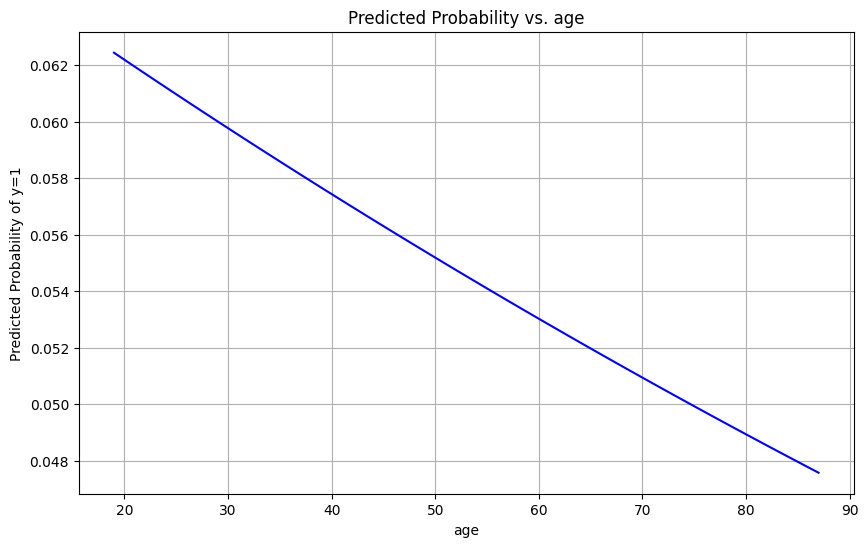

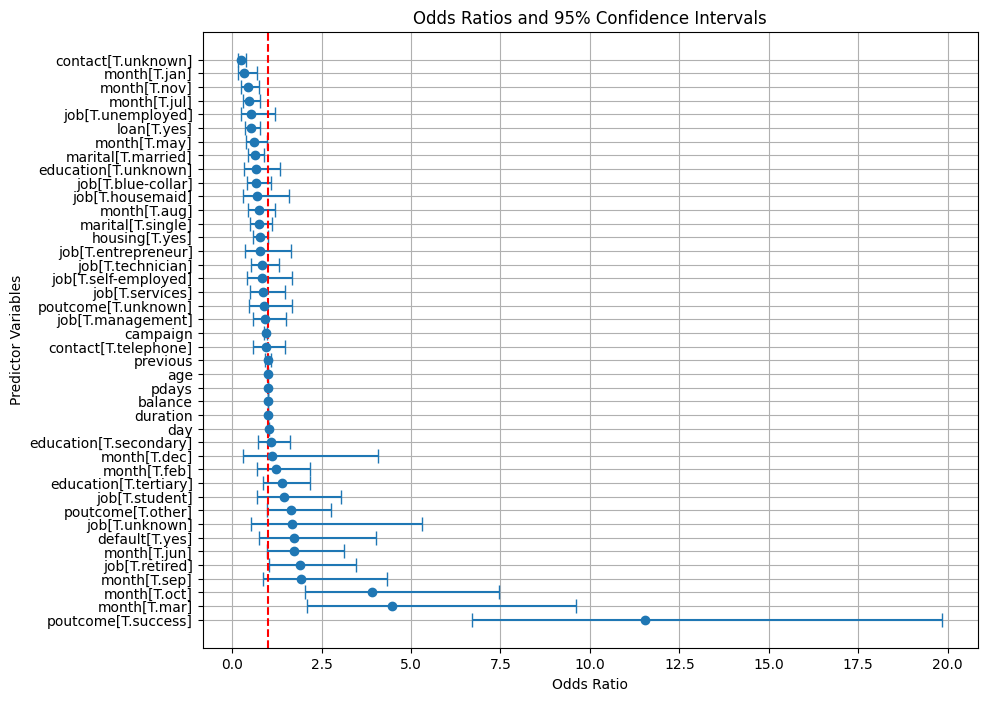

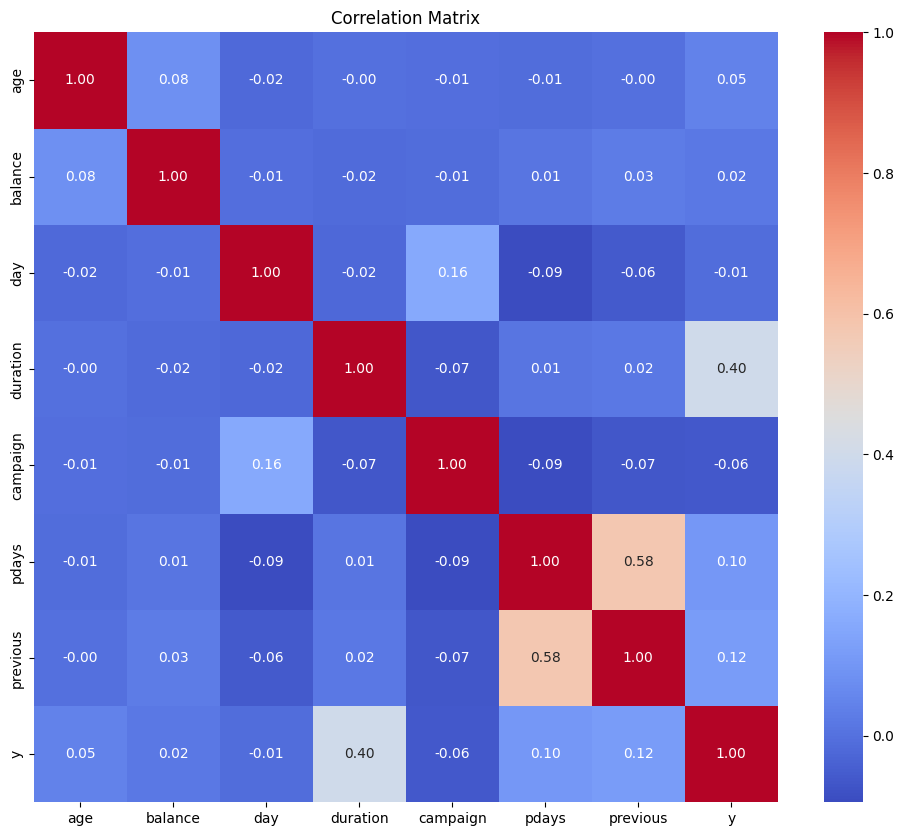

In [ ]:
# Install necessary libraries
!pip install pandas openpyxl statsmodels matplotlib seaborn

# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
try:
    df = pd.read_excel("bank marketing - logistic.xlsx")
except FileNotFoundError:
    print("Error: 'bank marketing - logistic.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Inspect the 'y' column
print("Original unique values in 'y' column:", df['y'].unique())

# Convert the 'y' column from strings to numbers
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Re-inspect the 'y' column
print("Unique values in 'y' column after conversion:", df['y'].unique())

# Ensure 'y' is one dimensional
print(f"The number of dimensions of y is {df['y'].ndim}")
if len(df['y'].unique()) > 2:
    print(f"ERROR: There are more than 2 unique values: {df['y'].unique()}")
    exit()

# Assuming 'y' is your dependent variable and you want to include all other columns as predictors
formula = 'y ~ ' + ' + '.join(df.columns.difference(['y']))

# Fit the logistic regression model
model = sm.logit(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

# --- Visualization ---

# 1. Predicted Probabilities vs. One Predictor (e.g., 'age')
def plot_predicted_probabilities(model, data, predictor_variable):
    """Plots predicted probabilities against a given predictor variable."""

    if predictor_variable not in data.columns:
        print(f"Error: Predictor variable '{predictor_variable}' not found in the dataset.")
        return

    data_sorted = data.sort_values(by=predictor_variable)
    # Generate a range of values for the predictor variable
    predictor_range = np.linspace(data_sorted[predictor_variable].min(), data_sorted[predictor_variable].max(), 100)

    # Create a new dataframe with these values
    new_data = pd.DataFrame({predictor_variable: predictor_range})

    # Iterate over the other columns and handle numeric/non-numeric differently.
    for col in data.columns.difference([predictor_variable, 'y']):
        if pd.api.types.is_numeric_dtype(data[col]):
            # If it's numeric, set the mean value.
            new_data[col] = data[col].mean()
        else:
            # If it's not numeric, set the most frequent value.
            new_data[col] = data[col].mode()[0]

    # Get predicted probabilities
    predicted_probabilities = model.predict(new_data)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(predictor_range, predicted_probabilities, color='blue')
    plt.xlabel(predictor_variable)
    plt.ylabel('Predicted Probability of y=1')
    plt.title(f'Predicted Probability vs. {predictor_variable}')
    plt.grid(True)
    plt.show()

# Example usage for 'age':
plot_predicted_probabilities(model, df, 'age')

# 2. Coefficients Plot (Odds Ratios)
def plot_coefficients(model):
    """Plots the coefficients (odds ratios) from the logistic regression model."""
    coefficients = model.params
    conf_int = model.conf_int()
    odds_ratios = np.exp(coefficients)
    lower_ci = np.exp(conf_int[0])
    upper_ci = np.exp(conf_int[1])

    # Create a DataFrame for easier plotting
    coef_df = pd.DataFrame({'Odds Ratio': odds_ratios,
                            'Lower CI': lower_ci,
                            'Upper CI': upper_ci})
    coef_df = coef_df.drop(index=['Intercept'])  # Drop the intercept for this plot
    coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.errorbar(x=coef_df['Odds Ratio'], y=coef_df.index,
                 xerr=[coef_df['Odds Ratio'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Odds Ratio']],
                 fmt='o', capsize=5)
    plt.axvline(x=1, color='red', linestyle='--')  # Add a vertical line at 1 for reference
    plt.xlabel('Odds Ratio')
    plt.ylabel('Predictor Variables')
    plt.title('Odds Ratios and 95% Confidence Intervals')
    plt.grid(True)
    plt.show()

# Example usage
plot_coefficients(model)


# 3. Correlation Matrix
def plot_correlation_matrix(data):
    """Plots the correlation matrix of the dataset."""
    corr = data.corr(numeric_only=True) # Only calculate correlations for numeric data
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Example usage:
plot_correlation_matrix(df)

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm

# Load the dataset
df = pd.read_excel("bank marketing - logistic.xlsx")

# Assuming 'y' is your dependent variable and you want to include all other columns as predictors
formula = 'y ~ ' + ' + '.join(df.columns.difference(['y']))

# Fit the logistic regression model
model = sm.logit(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (4521, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

Original unique values in 'y' column: ['no' 'yes']
Unique values in 'y' column after conversion: [0 1]
The number of dimensions of y is 1
Optimization terminated successfully.
         Current function value: 0.240395
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4478
Method:                           MLE   Df Model:                           42
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.3273
Time:                        14:34:19   Log-Likelihood:                -1086.8
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                3.119e-194
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

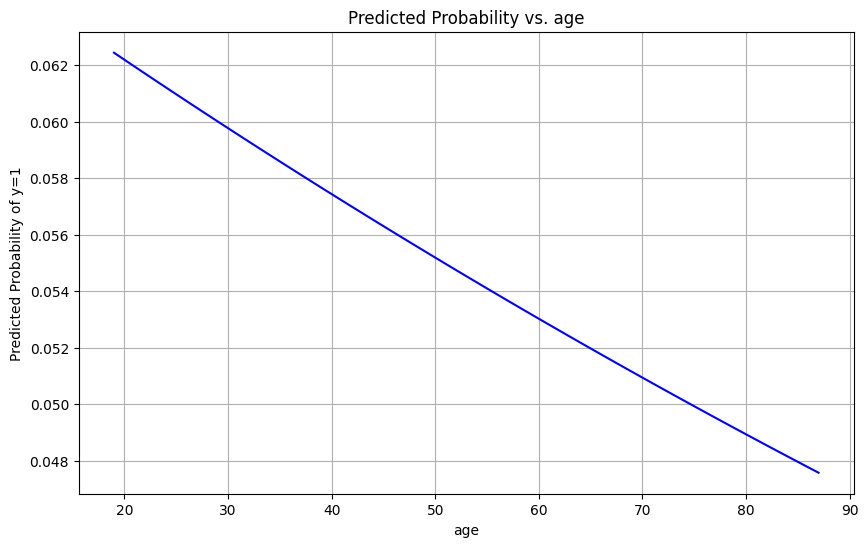

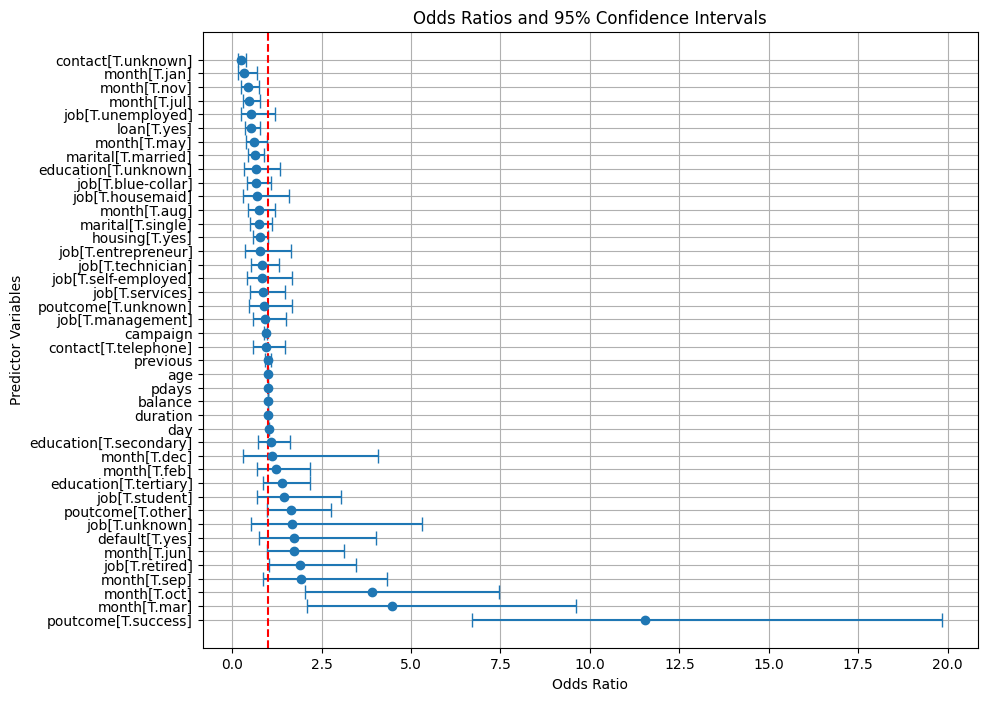

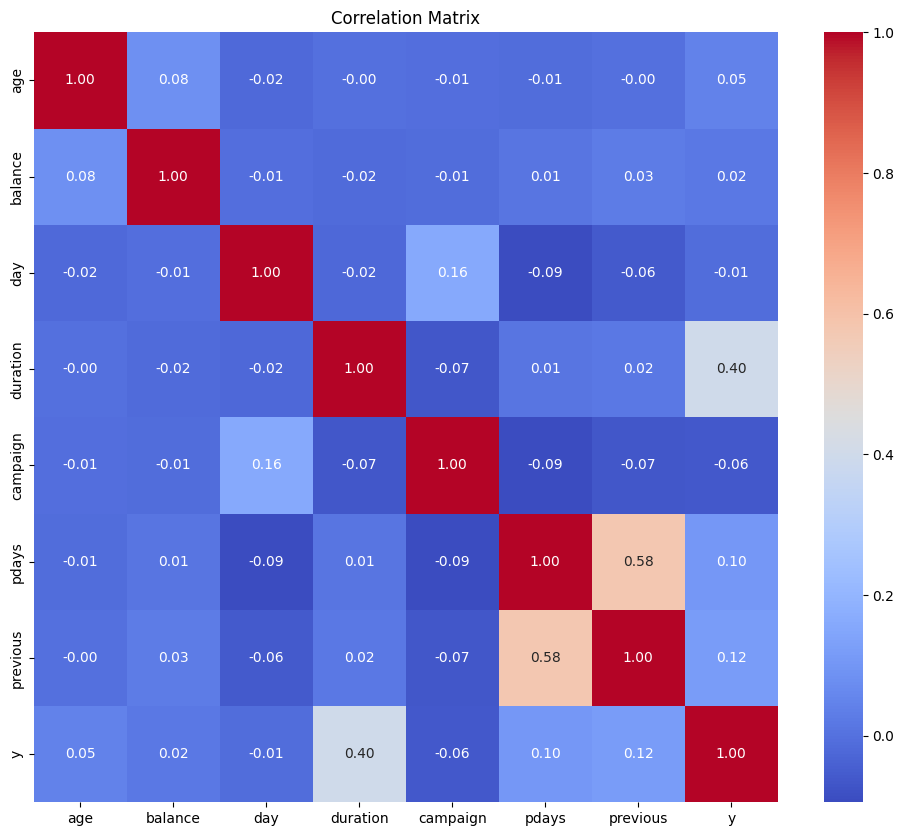

In [ ]:
# Install necessary libraries
!pip install pandas openpyxl statsmodels matplotlib seaborn

# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
try:
    df = pd.read_excel("bank marketing - logistic.xlsx")
except FileNotFoundError:
    print("Error: 'bank marketing - logistic.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Inspect the 'y' column to see what values it contains
print("Original unique values in 'y' column:", df['y'].unique())

# Convert the 'y' column from strings to numbers
# Map "yes" to 1 and "no" to 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Re-inspect the 'y' column to confirm changes
print("Unique values in 'y' column after conversion:", df['y'].unique())

# Ensure 'y' is one dimensional
# Check the dimension of y
print(f"The number of dimensions of y is {df['y'].ndim}")

# Ensure that there are only 2 values in the column
# Check to see if the number of unique values are greater than 2
if len(df['y'].unique()) > 2:
    print(f"ERROR: There are more than 2 unique values: {df['y'].unique()}")
    exit()

# Assuming 'y' is your dependent variable and you want to include all other columns as predictors
formula = 'y ~ ' + ' + '.join(df.columns.difference(['y']))

# Fit the logistic regression model
model = sm.logit(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

# --- Visualization ---

# 1. Predicted Probabilities vs. One Predictor (e.g., 'age')
def plot_predicted_probabilities(model, data, predictor_variable):
    """Plots predicted probabilities against a given predictor variable."""

    if predictor_variable not in data.columns:
        print(f"Error: Predictor variable '{predictor_variable}' not found in the dataset.")
        return

    data_sorted = data.sort_values(by=predictor_variable)
    # Generate a range of values for the predictor variable
    predictor_range = np.linspace(data_sorted[predictor_variable].min(), data_sorted[predictor_variable].max(), 100)

    # Create a new dataframe with these values
    new_data = pd.DataFrame({predictor_variable: predictor_range})

    # Iterate over the other columns and handle numeric/non-numeric differently.
    for col in data.columns.difference([predictor_variable, 'y']):
        if pd.api.types.is_numeric_dtype(data[col]):
            # If it's numeric, set the mean value.
            new_data[col] = data[col].mean()
        else:
            # If it's not numeric, set the most frequent value.
            new_data[col] = data[col].mode()[0]

    # Get predicted probabilities
    predicted_probabilities = model.predict(new_data)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(predictor_range, predicted_probabilities, color='blue')
    plt.xlabel(predictor_variable)
    plt.ylabel('Predicted Probability of y=1')
    plt.title(f'Predicted Probability vs. {predictor_variable}')
    plt.grid(True)
    plt.show()

# Example usage for 'age':
plot_predicted_probabilities(model, df, 'age')

# 2. Coefficients Plot (Odds Ratios)
def plot_coefficients(model):
    """Plots the coefficients (odds ratios) from the logistic regression model."""
    coefficients = model.params
    conf_int = model.conf_int()
    odds_ratios = np.exp(coefficients)
    lower_ci = np.exp(conf_int[0])
    upper_ci = np.exp(conf_int[1])

    # Create a DataFrame for easier plotting
    coef_df = pd.DataFrame({'Odds Ratio': odds_ratios,
                            'Lower CI': lower_ci,
                            'Upper CI': upper_ci})
    coef_df = coef_df.drop(index=['Intercept'])  # Drop the intercept for this plot
    coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.errorbar(x=coef_df['Odds Ratio'], y=coef_df.index,
                 xerr=[coef_df['Odds Ratio'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Odds Ratio']],
                 fmt='o', capsize=5)
    plt.axvline(x=1, color='red', linestyle='--')  # Add a vertical line at 1 for reference
    plt.xlabel('Odds Ratio')
    plt.ylabel('Predictor Variables')
    plt.title('Odds Ratios and 95% Confidence Intervals')
    plt.grid(True)
    plt.show()

# Example usage
plot_coefficients(model)


# 3. Correlation Matrix
def plot_correlation_matrix(data):
    """Plots the correlation matrix of the dataset."""
    corr = data.corr(numeric_only=True) # Only calculate correlations for numeric data
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Example usage:
plot_correlation_matrix(df)

Sample Data:
          X          y
0  5.488135  10.811120
1  7.151894  16.204614
2  6.027634  13.520930
3  5.448832  10.361420
4  4.236548  10.961348

Model Evaluation:
Mean Squared Error (MSE): 0.92
Root Mean Squared Error (RMSE): 0.96
R-squared (R2): 0.96

Model Coefficients:
Intercept: 1.21
Coefficient: 2.00


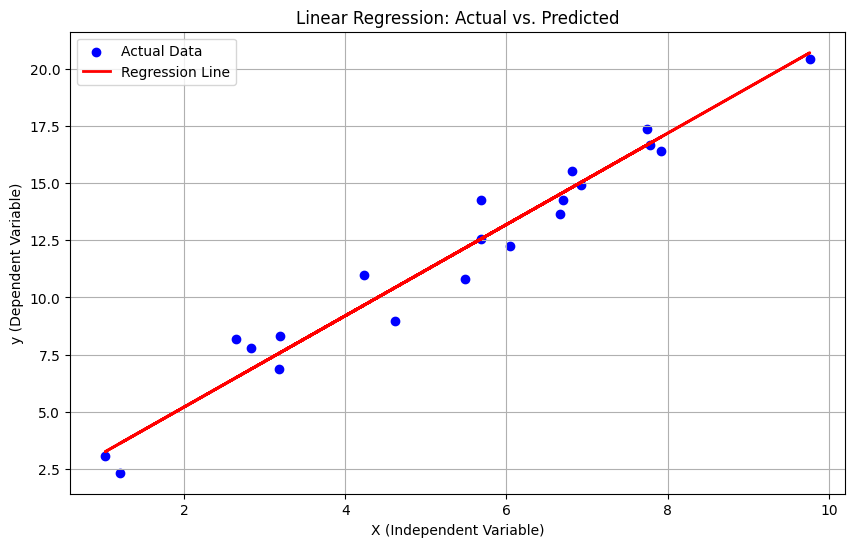

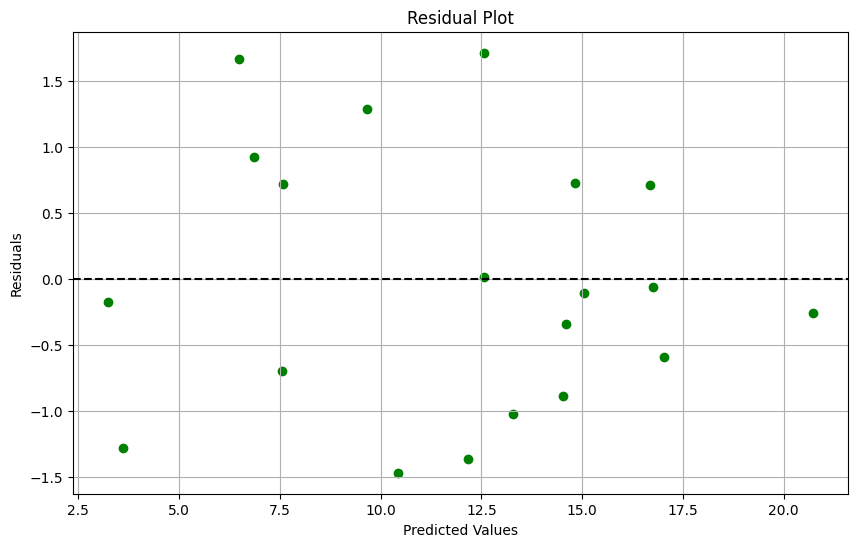

In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_data.csv' with your actual data file)
# I am creating a sample dataset for this example
# Normally you would load a csv file using: df = pd.read_csv('your_data.csv')
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature, values between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with noise
df = pd.DataFrame(np.concatenate((X,y), axis=1), columns=['X','y'])

# Display the first few rows of the dataset
print("Sample Data:")
print(df.head())

# Separate features (X) and target (y)
X = df[['X']]  # Features (independent variable)
y = df['y']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Print the model's coefficients
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

# Visualization: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()
